In [1]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.0/908.0 KB 27.3 MB/s eta 0:00:00


Importing the modules

In [8]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
import numpy
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.seasonal import STL
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMAResults
import scipy.stats as stats
import warnings
import yfinance as yf
from arch import arch_model
from scipy.stats import skew, kurtosis

Getting the dataframe ready

Axes(0.125,0.11;0.775x0.77)


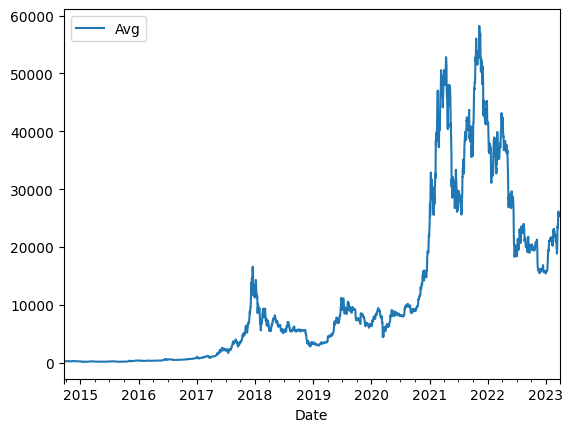

In [39]:
df = pd.read_csv("BTC-EUR.csv")
df['Date']= pd.to_datetime(df['Date'])
df['Avg'] = df[["High","Low"]].mean(axis=1)
print(df.plot(x="Date",y="Avg"))

Axes(0.125,0.11;0.775x0.77)


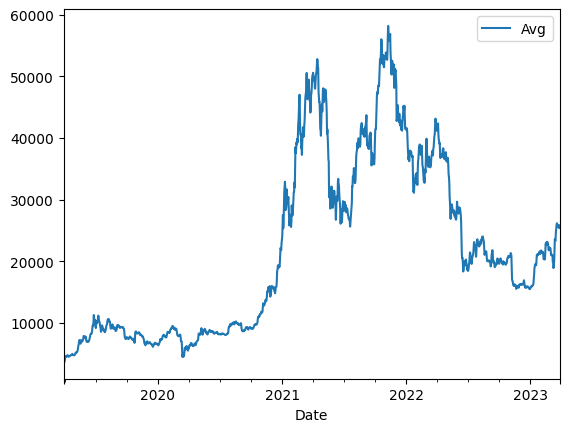

In [41]:
df = pd.read_csv("BTC-EUR (2).csv")
df['Date']= pd.to_datetime(df['Date'])
df['Avg'] = df[["High","Low"]].mean(axis=1)
print(df.plot(x="Date",y="Avg"))

Axes(0.125,0.11;0.775x0.77)


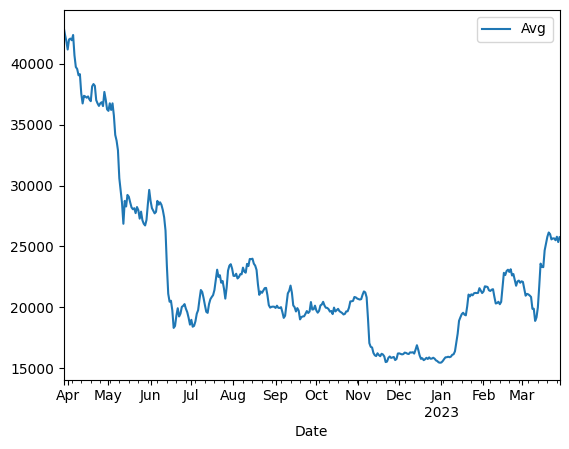

In [16]:
df = pd.read_csv("BTC-EUR (4).csv")
df['Date']= pd.to_datetime(df['Date'])
df['Avg'] = df[["High","Low"]].mean(axis=1)
print(df.plot(x="Date",y="Avg"))

In [43]:
df = pd.read_csv("BTC-EUR (6).csv")

In [44]:
df['Date']= pd.to_datetime(df['Date'])

In [45]:
df['Avg'] = df[["High","Low"]].mean(axis=1)

Plotting the BTC-EUR price per date

Axes(0.125,0.11;0.775x0.77)


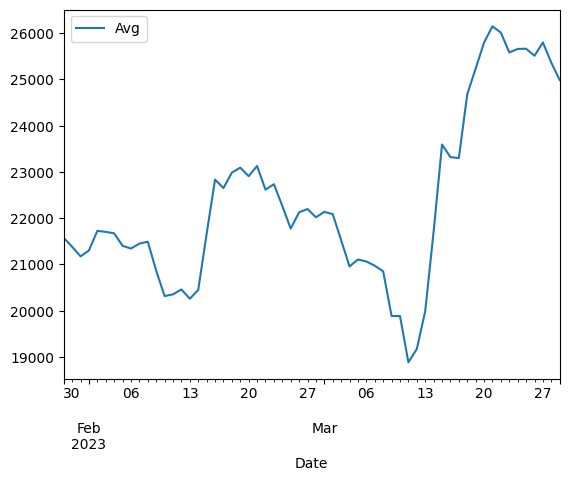

In [46]:
print(df.plot(x="Date",y="Avg"))

ARIMA Model = (2,1,2) and here are the results

In [47]:
model = ARIMA(df.Avg, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    Avg   No. Observations:                   60
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -455.196
Date:                Thu, 30 Mar 2023   AIC                            920.393
Time:                        15:31:47   BIC                            930.780
Sample:                             0   HQIC                           924.448
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2174      0.514     -2.367      0.018      -2.225      -0.209
ar.L2         -0.2185      0.500     -0.437      0.662      -1.199       0.762
ma.L1          1.3901      0.550      2.530      0.0

For the residuals

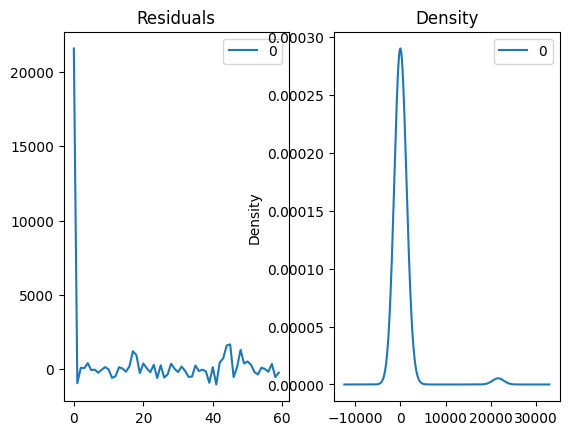

In [48]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals",ax = ax[0])
residuals.plot(kind='kde',title= 'Density', ax=ax[1])
plt.show()

Figure(1200x600)


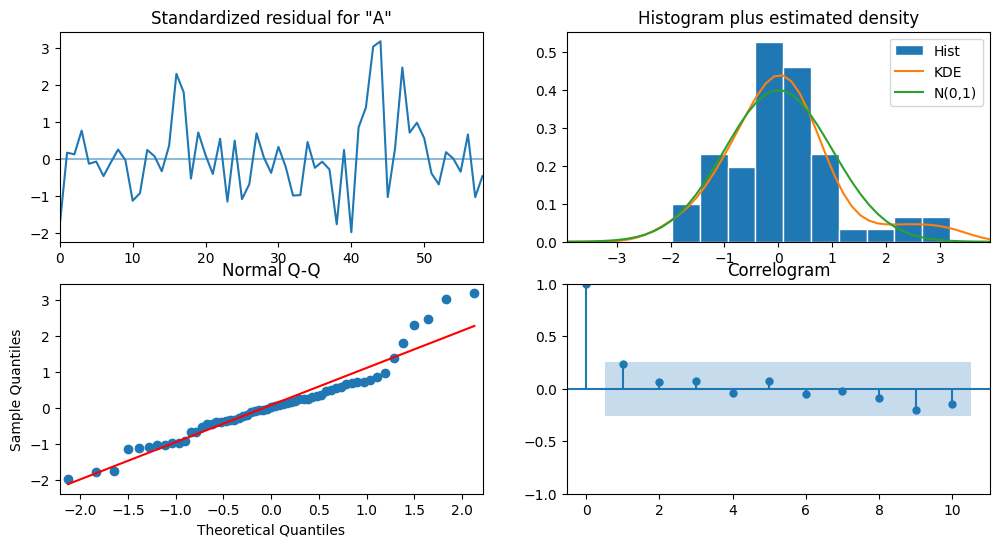

In [49]:
print(model_fit.plot_diagnostics(figsize=(12,6)))

For the ARCH Model

<Axes: title={'center': 'BTC-EUR returns'}>

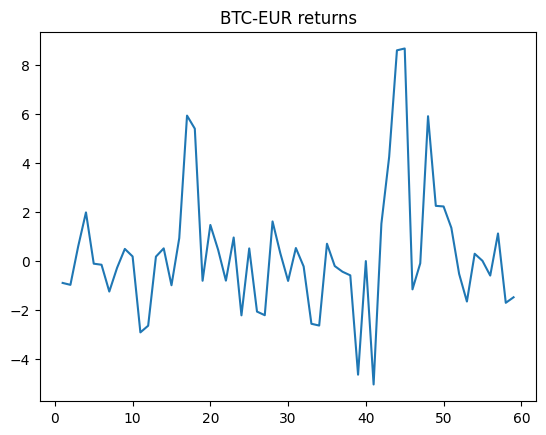

In [50]:
returns = 100 * df.Avg.pct_change().dropna()
returns.name = 'asset_returns'
returns.plot(title="BTC-EUR returns")

In [51]:
model_q0 = arch_model(returns, mean = 'Zero', vol = 'ARCH', p = 1, q = 0)

In [52]:
model_fitted_q0 = model_q0.fit(disp='off')
print(model_fitted_q0.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.017
Vol Model:                       ARCH   Log-Likelihood:               -134.547
Distribution:                  Normal   AIC:                           273.094
Method:            Maximum Likelihood   BIC:                           277.249
                                        No. Observations:                   59
Date:                Thu, Mar 30 2023   Df Residuals:                       59
Time:                        15:31:54   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          4.1667      1.298      3.211  1.323e-03    [  

For the GARCH Model

In [67]:
model_q1 = arch_model(returns, mean = 'Zero', vol = 'GARCH', p = 1, q = 1)

In [68]:
model_fitted_q1 = model_q1.fit(disp='off')
print(model_fitted_q1.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.017
Vol Model:                      GARCH   Log-Likelihood:               -132.722
Distribution:                  Normal   AIC:                           271.444
Method:            Maximum Likelihood   BIC:                           277.677
                                        No. Observations:                   59
Date:                Thu, Mar 30 2023   Df Residuals:                       59
Time:                        15:49:46   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.7660      0.824      2.143  3.212e-02    [  

Figure(640x480)


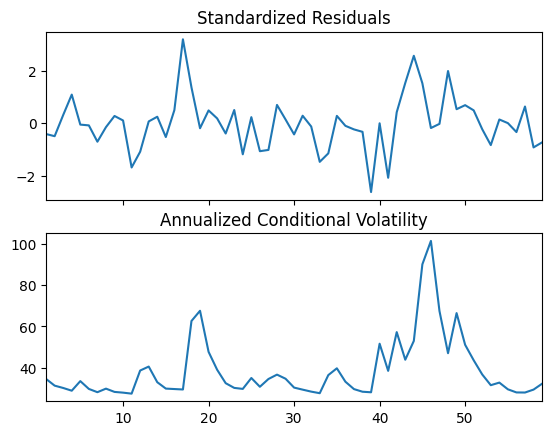

In [55]:
print(model_fitted_q1.plot(annualize='D'))

In [56]:
residuals_arch = pd.DataFrame(model_fitted_q1.resid)

In [57]:
skewness_df = skew(residuals_arch)
skewness_df

array([1.25908743])

In [58]:
kurtosis_df = kurtosis(residuals_arch,axis = 0,bias =True)
kurtosis_df

array([2.48117688])

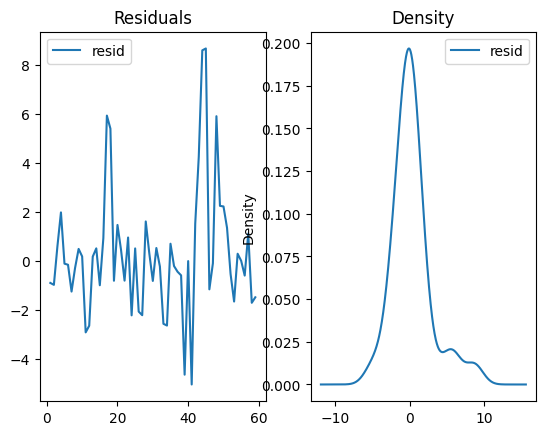

In [59]:
fig, ax = plt.subplots(1,2)
residuals_arch.plot(title="Residuals",ax = ax[0])
residuals_arch.plot(kind='kde',title= 'Density', ax=ax[1])
plt.show()

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


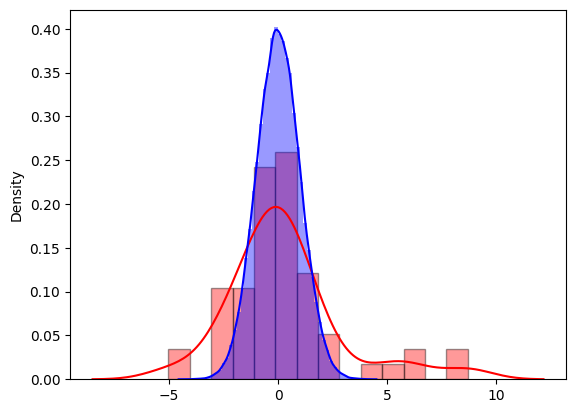

In [60]:
warnings.filterwarnings('ignore')
print(sns.distplot(a=residuals_arch, color='red',
             hist_kws={"edgecolor": 'black'}))

mean = 0
std = 1
data = np.random.normal(mean, std, 100000)

# plot the data as a histogram
print(sns.distplot(a=data, color='blue',kde = True))